# Load dataset and give a look


In [1]:
import pandas as pd
import numpy as np

#maschi 1 femmine 0
#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
#directory = r'C:\Users\italo\OneDrive\Desktop\alzheimer'
#file = 'prova_spearman.csv'
directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'yoo.csv'
df_2 = pd.read_csv(f'{directory}/{file}')

print(df_2.shape)
df_2.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [2]:
df_2 = df_2.drop(columns = ['Hand', 'Delay']) #we dropped these two variables becauese are useless
df_2.head()
# 0 -> male, 1 -> female

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,0,74,2,3,29,0,1344,0.743,"1,306"
1,OAS1_0002_MR1,0,55,4,1,29,0,1147,0.810,"1,531"
2,OAS1_0003_MR1,0,73,4,3,27,1,1454,0.708,"1,207"
3,OAS1_0010_MR1,1,74,5,2,30,0,1636,0.689,"1,073"
4,OAS1_0011_MR1,0,52,3,2,30,0,1321,0.827,"1,329"


In [3]:
df_2 = df_2.drop(columns = ['ID']) #we also dropped ID
df_2.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [6]:
df_2['ASF'] = df_2['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [7]:
df_2.dtypes

M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

# EDA Approach

In [8]:
#from sklearn.linear_model import LogisticRegression

classes = df_2['CDR'].unique()  #to create a list of labels
print(classes)

[0 1 2 3]


In [9]:
count_classes = df_2['CDR'].value_counts() #it returns count of classes
print(count_classes)

0    133
1     57
2     24
3      2
Name: CDR, dtype: int64


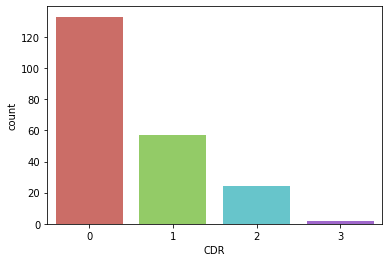

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot(x ='CDR', data = df_2, palette = 'hls') #to plot an histogram of count classes
plt.show()
#plt.savefig('Istogramma')

In [11]:
df_2_no_Educ_Sex = df_2.drop(columns = ['Educ', 'M/F', 'SES']) #we dropped Educ because it is categorical
df_2_no_Educ_Sex.groupby('CDR').mean() #we got means of every feature with CDR

,Age,MMSE,eTIV,nWBV,ASF
CDR,,,,,
0,69.233083,29.097744,1439.443609,0.769188,1.232474
1,77.070175,25.877193,1495.438596,0.728175,1.191333
2,78.458333,21.958333,1477.791667,0.705500,1.194625
3,82.000000,15.000000,1456.500000,0.684000,1.207000


In [12]:
df_2_only_Educ_Sex = df_2.drop(columns = ['Age', 'MMSE', 'eTIV', 'nWBV']) #we dropped these features because aren't categorical
df_2_only_Educ_Sex.groupby('CDR').median() #to gain median for every class

,M/F,Educ,SES,ASF
CDR,,,,
0,0.0,4.0,2.0,1.2520
1,0.0,3.0,3.0,1.2000
2,0.0,2.0,3.0,1.1885
3,0.5,2.0,3.5,1.2070


In [13]:
pd.crosstab(df_2.CDR, df_2.Age) #to create matrix of class for ages

#plt.savefig("oooo", format='pdf')

Age,33,39,45,46,47,48,49,50,51,52,...,86,87,88,89,90,91,92,93,94,96
CDR,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,3,3,3,2,1,3,3,...,2,2,3,4,5,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,2,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# scatterplots of classes

## Mild Dementia

Text(0, 0.5, 'frequency')

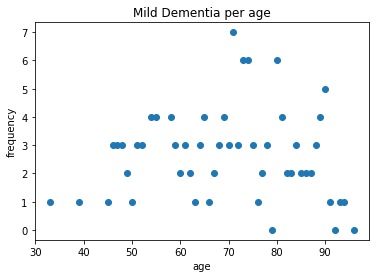

In [14]:
from matplotlib import pyplot as plt
import numpy as np

array_1 = np.array(pd.crosstab(df_2.Age, df_2.CDR)) #we conterted into array numpy for semplicity
mild_dementia = array_1.T[0] #to create an array of frequency for ages
#print(moderate_dementia)
ages = df_2['Age'].unique()
ages = sorted(ages) #to create an array of sorted ages


#df_2.plot.scatter(x=ages,y=moderate_dementia)
plt.scatter(ages, mild_dementia) #to create a scatterplot
plt.title('Mild Dementia per age')
plt.xlabel('age')
plt.ylabel('frequency')

## Moderate Dementia

Text(0, 0.5, 'frequency')

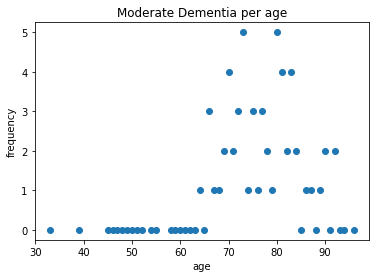

In [15]:
#array = np.array(pd.crosstab(df_2.CDR, df_2.Age))
array_1 = np.array(pd.crosstab(df_2.Age, df_2.CDR)) #we conterted into array numpy for semplicity
moderate_dementia = array_1.T[1] #to create an array of frequency for ages
#print(moderate_dementia)
ages = df_2['Age'].unique()
ages = sorted(ages) #to create an array of sorted ages

plt.scatter(ages, moderate_dementia) #to create a scatterplot
plt.title('Moderate Dementia per age')
plt.xlabel('age')
plt.ylabel('frequency')

## Nondementia

Text(0, 0.5, 'frequency')

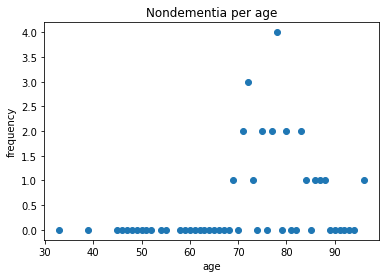

In [16]:
array_1 = np.array(pd.crosstab(df_2.Age, df_2.CDR)) #we conterted into array numpy for semplicity
nondementia = array_1.T[2] #to create an array of frequency for ages
#print(moderate_dementia)
ages = df_2['Age'].unique()
ages = sorted(ages) #to create an array of sorted ages

plt.scatter(ages, nondementia) #to create a scatterplot
plt.title('Nondementia per age')
plt.xlabel('age')
plt.ylabel('frequency')

## Very Mild Dementia

Text(0, 0.5, 'frequency')

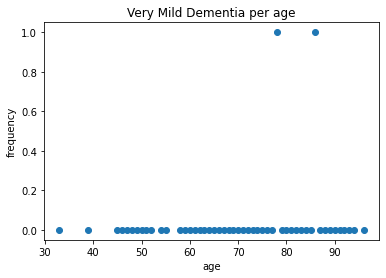

In [17]:
array_1 = np.array(pd.crosstab(df_2.Age, df_2.CDR)) #we conterted into array numpy for semplicity
very_mild_dementia = array_1.T[3] #to create an array of frequency for ages
#print(moderate_dementia)
ages = df_2['Age'].unique()
ages = sorted(ages) #to create an array of sorted ages

plt.scatter(ages, very_mild_dementia) #to create a scatterplot
plt.title('Very Mild Dementia per age')
plt.xlabel('age')
plt.ylabel('frequency')

# Stacked Bar Chart

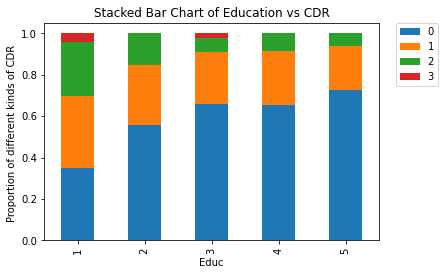

In [18]:
table=pd.crosstab(df_2.Educ,df_2.CDR)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs CDR')
plt.xlabel('Educ')
plt.ylabel('Proportion of different kinds of CDR ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.savefig('mariral_vs_pur_stack')

## Crossbar SES

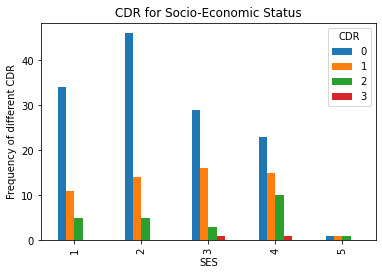

In [19]:
pd.crosstab(df_2.SES,df_2.CDR).plot(kind='bar')
plt.title('CDR for Socio-Economic Status')
plt.xlabel('SES')
plt.ylabel('Frequency of different CDR')
plt.show()
#plt.savefig('pur_dayofweek_bar')

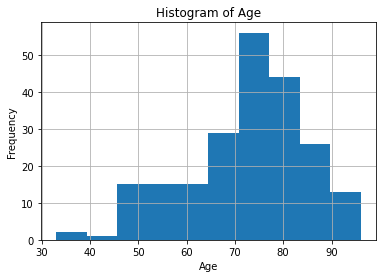

In [20]:
## Histogram of Ages

df_2.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('hist_age')